# Similitud entre documentos

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Conectamos con Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
PATH_SIMILARIDAD = '/content/drive/MyDrive/Colab Notebooks/nlp_introduction_course/data/text-similarity'

Mounted at /content/drive


## Procesado de textos

Aqui basicamente vamos a descomponer las tareas de limpieza y procesado de texto, de forma que estas sean reutilizables para cualquiera de los textos que vamos a usar

- Eliminamos las Stop Words

In [ ]:
from string import punctuation
from nltk.corpus import stopwords

def eliminar_stop_words(texto, idioma):
  texto_limpio = ''
  stop_words = stopwords.words(idioma)
  signos_puntuación = list(punctuation)
  for word in texto.split():
    if word not in stop_words and word not in signos_puntuación:
      texto_limpio += word + ' '
  return texto_limpio

- Eliminamos signos de puntuacion

In [ ]:
def eliminar_puntuacion(texto):
  signos_puntuacion = list(punctuation)
  for word in signos_puntuacion:
    texto = texto.replace(word, '')
  return texto

- Realizamos Stemmet para eliminar sufijos de las pablabras

In [ ]:
from nltk.stem import SnowballStemmer
def aplicar_stemmer(texto, idioma):
  stemmer = SnowballStemmer(idioma)
  texto_stemmed = ''
  for word in texto.split():
    texto_stemmed += stemmer.stem(word) + ' '
  return texto_stemmed

- Juntamos todo creando un Pipeline

In [ ]:
def procesar_fichero(nombre_fichero,idioma):
  texto = open(nombre_fichero,"r").read() # Leemos el fichero
  texto = texto.lower() # Pasamos todo a minusculas
  texto = eliminar_stop_words(texto,idioma) # Eliminamos Stop Words
  texto = eliminar_puntuacion(texto) # Eliminamos signos de puntuacion
  texto = aplicar_stemmer(texto,idioma) # Aplicamos Stemmer
  return texto
  

Leeamos todos los ficheros de texto y los procesamos

In [ ]:
textos = {} # Diccionario de textos procesados, con la forma nombre_fichero -> texto procesado

In [ ]:
import os
for file in os.listdir(PATH_SIMILARIDAD): # Para todos los ficheros en el directorio
  if file.endswith('.txt'):
    texto = procesar_fichero(f'{PATH_SIMILARIDAD}/{file}','english')
    textos[file.replace('.txt', '')] = texto

In [ ]:
print(textos)

{'java_cert': 'word oracl java certif oracl java enterpris architect certif one last level certif path give oracl certifi master grade one toughest tech certif at least mail receiv pass besid fact give confid decis respect colleagu great boost resum import thing obtain certif say destini journey peopl realli confid develop abil that perfect okay know mani brilliant guy start develop earlier write beauti code confid code start certif path start path way decor cv wit process much learn much code design capabl could improv achiev next certif java programm 1 java programm 2 java web servic develop java enterpris architect certif took least one oracl cours prepar myself tell cours realli worth price pay besid new specif featur current jdk version learn good code practic must avoid write java lesson oo principl design realli use matter experienc area as time principl may constant review avoid common pitfal two first level realli get java insid thing give sure string manag memori manag divid 

## Calculo de TF-IDF

Como sabemos **TF**, representa la frecuencia en la que una palabra aparece en un docuemento, y se calcula como: $TF  =\frac{Frecuencia \space palabra}{Total \space Palabras}$ 

IDF representa la imporancia relativa en la que la palabra, aparece en el resto de documentos, se calcula como : $IDF  =\log({\frac{Número \space documentos}{Documentos \space en \space los \space que \space aparece \space la \space palabra}})$ 

Calculandose $TF\_IDF  =TF * IDF$ 

Con esto generaremos vectores para los documentos a partir de los cuales poderemos calcular la similitud

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer ()
X = vectorizer.fit_transform(textos.values())

Obtenemos una matriz dispersa, para todos los textos, con todas las palabras del diccionario

In [ ]:
X.shape

(5, 1318)

## Calculo de similitud

En este caso aplicamos la distancia coseno, es decir el ángulo entre dos vectores

![](https://leantechblog.files.wordpress.com/2020/08/scalar-product.svg_.png?w=300&h=258)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
matriz_semejanza =  cosine_similarity(X,X) # Calcular la semejanza entre cada uno de los vectores de cada uno de los documentos

In [ ]:
matriz_semejanza

array([[1.        , 0.05551756, 0.05794068, 0.08676126, 0.05424583],
       [0.05551756, 1.        , 0.09081205, 0.28299793, 0.08690653],
       [0.05794068, 0.09081205, 1.        , 0.09195585, 0.3443661 ],
       [0.08676126, 0.28299793, 0.09195585, 1.        , 0.13316112],
       [0.05424583, 0.08690653, 0.3443661 , 0.13316112, 1.        ]])

La diagonal, representa la distancia de un documento consigo mismo, vamos a pintarlo en un mapa de calor, para interpretar mejor el resultado

# Represtación gráfica del resultado

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

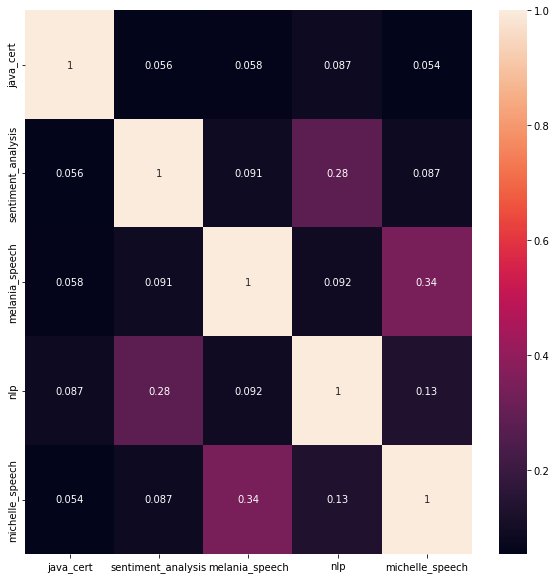

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))      
heat_map = sb.heatmap(matriz_semejanza, annot=True, xticklabels=textos.keys(), yticklabels=textos.keys())
plt.show()

Podemos ver que existe una gran similitud entre los textos de Michelle Obama y Melania Trump **0.34**, a pesar de que pertenecen a partidos políticos opuestos, y a priorí seria logico que sus discursos tendiesen a ser tambien opuestos.

Tambien se aprecia gran similitud entre los textos relativos a nlp y analisis de sentimiento, lo cual es lógico, ya que son temas realcionados

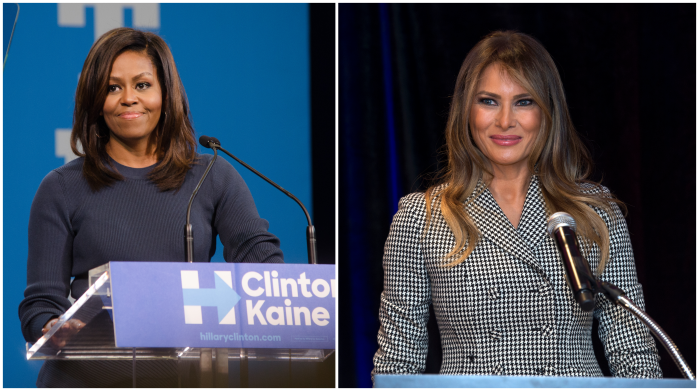